In this notebook, we implement the simplex method for linear program.
Considering following linear program problem as an example 
\begin{eqnarray}
max\ z=cx\\ s.t. \left\{ \begin{gathered}  Ax=b \hfill \\  x\geq 0 \hfill \\  \end{gathered} \right.
\end{eqnarray}
where $c=\begin{bmatrix}5&2&0&0&0\end{bmatrix}$, $x=\begin{bmatrix}x_1\\x_2\\x_3\\x_4\\x_5\end{bmatrix}$, $A=\begin{bmatrix}30&20&1&&\\5&1&&1&\\1&&&&1\\ \end{bmatrix} $, $B=\begin{bmatrix}160\\15\\4\end{bmatrix}$.

In [1]:
#python 3
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
 
 
class Solution:
    def __init__(self):
        pass
 
    def set_para(self,A,b,z):
        # A m*n
        # b m*1
        # z 1*(m+1)
        self.A=A
        self.b=b
        self.z=z
         
        self.m,self.n=A.shape
        self.x_index=[i for i in range(self.n)]
 
    def get_init_solution(self):
        for JB in combinations(range(self.n),self.m):
            if self._is_solution(JB):
                JB,JN=self._rearrange(JB)
                self._set_JB_JN(JB,JN)
                return True
        return False
 
    def _is_solution(self,JB):
        B=np.hstack([self.A[:,i] for i in JB])

        if np.linalg.det(B):
            return True
        return False
 
    def _rearrange(self,JB):
        JN=[i for i in range(self.n) if i not in JB]
        B=np.hstack([self.A[:,i] for i in JB])
        N=np.hstack([self.A[:,i] for i in JN])
        self.z=[self.z[0,i] for i in JB]+[self.z[0,i] for i in JN]+[self.z[0,-1]]
        self.z=np.matrix([self.z],dtype=float)

        self.A=np.hstack((np.eye(self.m),B.I*N))
        self.b=np.dot(B.I,self.b)

        self.x_index=list(JB)+list(JN)
        JB=[i for i in range(self.m)]
        JN=[i for i in range(self.m,self.n)]

        for i in range(self.m):
            _change=np.zeros((1,self.n+1))
            _change[0,:self.n]=self.A[i,:]
            _change[0,-1]=-self.b[i,0]
            self.z-=_change*self.z[0,i]
        return JB,JN
 
    def _set_JB_JN(self,JB,JN):
        self.JB=JB
        self.JN=JN
 
    def is_best(self):
        best,inf_solution=True,False
        for i in self.JN:
            sigma=self.z[0,i]
            if sigma>0:
                best=False
            elif sigma==0:
                inf_solution=True
        return best,inf_solution
 
    def get_inVar(self):
        greatest_sigma=0
        for i in self.JN:
            sigma=self.z[0,i]
            if greatest_sigma<sigma:
                greatest_sigma=sigma
                inVar=i
        return inVar
 
    def get_outVar(self,inVar):
        min_ratio=self.b[self.JB[0],0]/self.A[self.JB[0],inVar]
        outVar=self.JB[0]
        flag=False
        for i in self.JB[1:]:
            k=self.A[i,inVar]
            if k>0:
                flag=True
                _tmp=self.b[i,0]/k
                if _tmp<min_ratio:
                    min_ratio=_tmp
                    outVar=i
        if flag==False:
            return None
        return outVar
 
    def in_and_out(self,inVar,outVar):
        self.A[:,[inVar,outVar]]=self.A[:,[outVar,inVar]]
        self.x_index[outVar],self.x_index[inVar]=self.x_index[inVar],self.x_index[outVar]
        self.z[0,inVar],self.z[0,outVar]=self.z[0,outVar],self.z[0,inVar]
        B=np.hstack([self.A[:,i] for i in self.JB])
        N=np.hstack([self.A[:,i] for i in self.JN])

        self.A=np.hstack((np.eye(self.m),B.I*N))
        self.b=np.dot(B.I,self.b)

         
        for i in range(self.m):
            _change=np.zeros((1,self.n+1))
            _change[0,:self.n]=self.A[i,:]
            _change[0,-1]=-self.b[i,0]
            self.z-=_change*self.z[0,i]
    def getX(self):
        x=[0]*self.n
        for i in self.JB:
            x[self.x_index[i]]=self.b[i,0]
        return x
         
class Simplex:
    def __init__(self):
        self.solution=Solution()
 

        self.status=0
 
    def set_para(self,A,b,z):

        self.solution.set_para(A,b,z)
     
    def output_result(self):
        self._main()
        if self.status==1:
            print("unbounded!")
        elif self.status==2:
            print("This problem has an optimal solution.")
        elif self.status==3:
            print("This problem has infinite optimal solutions.")
     
    def _main(self):
       
        self._get_init_solution()
        if self.status==1:
            return
 
        while True:
            print ("--------------------")
            print ("z:",self.solution.z[0,-1])
            print ("x:",self.solution.getX())
         
            self._is_best()
            if self.status in (2,3):
                return
 
         
            self._mainloop()
            if self.status in (1,2):
                return
 
    def _get_init_solution(self):
        if self.solution.get_init_solution():
            self.status=0
        else:
            self.status=1
 
    def _is_best(self):
        best,inf_solution=self.solution.is_best()
        if best==True and inf_solution==False:
            self.status=2
        elif best==True and inf_solution==True:
            self.status=3
        else:
            self.status=0
 
    def _mainloop(self):
        inVar =self.solution.get_inVar()
        outVar=self.solution.get_outVar(inVar)
     
        if outVar==None:
            self.status=1
            return
        self.solution.in_and_out(inVar,outVar)
if __name__=="__main__":
    s=Simplex()
 
    A=np.matrix([[30,20,1,0,0],
                 [ 5, 1,0,1,0],
                 [ 1, 0,0,0,1]])
 
    b=np.matrix([[160,15,4]]).T

    z=np.matrix([[5,2,0,0,0 ]])    
    
    #A = np.matrix([[1,1,1,0,0],[2,1,0,1,0],[1,0,0,0,1]])
    #b  = np.matrix([40,60,30]).T
    #Z = np.matrix([-3,-2,0,0,0])

    #A = np.matrix([[-1, -1, -1], [-1,2, 0], [0, 0, -1], [-1, 0, 0], [0, -1, 0]])
    #b = np.matrix([-1000, 0, -340, 0, 0]).T
    #Z = np.matrix([10,15,25])   
    
    s.set_para(A,b,z)
    s.output_result()

--------------------
z: 10.000000000000004
x: [4.0, -4.999999999999998, 139.99999999999997, 0, 0]
--------------------
z: 20.000000000000004
x: [2.000000000000001, 5.0, 0, 0, 1.9999999999999993]
This problem has an optimal solution.


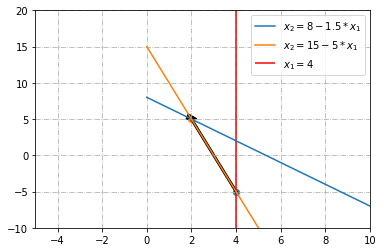

In [2]:
x = np.linspace(0.0,10.0,100)
y1 = 8-1.5*x
y2 = 15-5*x

 
plt.plot(x,y1,label=r'$x_2=8-1.5*x_1$')
plt.plot(x,y2,label=r'$x_2 = 15-5*x_1$')
plt.vlines(4, -20, 20, colors = "r",label=r'$x_1 = 4$')
#plt.plot(x,y3,label=r'$y=-0.3*x+7.0$')

 
plt.xlim((-5, 10.000))
plt.ylim((-10, 20.000))
plt.grid(True, linestyle='-.')
    
x1r_0,x2r_0 = [4.0, -5]
x1r_1,x2r_1 = [2.0, 5.0 ]

    
plt.scatter(x1r_0,x2r_0)

plt.scatter(x1r_1,x2r_1)
 
plt.arrow(x1r_0,x2r_0, x1r_1-x1r_0,x2r_1-x2r_0, width=0.1, head_width=0.5, fc='k', ec='k',hatch='+')
plt.legend()

    
plt.show()